In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


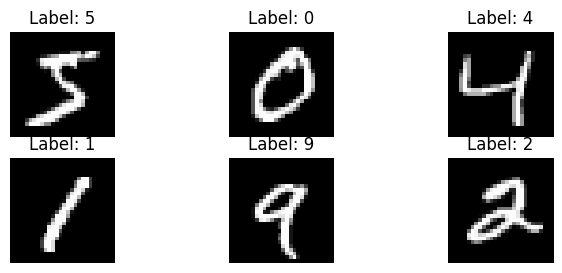

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# Show first 6 images
plt.figure(figsize=(8,3))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [3]:
# Define a Simple Neural Network
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the Model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8421 - loss: 0.5707 - val_accuracy: 0.9440 - val_loss: 0.1935
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9494 - loss: 0.1758 - val_accuracy: 0.9568 - val_loss: 0.1522
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9651 - loss: 0.1188 - val_accuracy: 0.9659 - val_loss: 0.1189
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9748 - loss: 0.0871 - val_accuracy: 0.9697 - val_loss: 0.1011
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9810 - loss: 0.0658 - val_accuracy: 0.9683 - val_loss: 0.1035


In [5]:
# Evaluate Performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9658 - loss: 0.1076
Test accuracy: 0.9713


In [6]:
# Make Predictions
predictions = model.predict(x_test[:5])
for i, pred in enumerate(predictions):
    print(f"Image {i}: predicted {np.argmax(pred)}, actual {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Image 0: predicted 7, actual 7
Image 1: predicted 2, actual 2
Image 2: predicted 1, actual 1
Image 3: predicted 0, actual 0
Image 4: predicted 4, actual 4


# Extension Ideas
	•	Increase Complexity: Add additional hidden layers or change activation functions.
	•	Data Augmentation: Use `tf.keras.preprocessing.image.ImageDataGenerator` to augment training data.
	•	Different Dataset: Swap MNIST for Fashion-MNIST by replacing `tf.keras.datasets.mnist` with `fashion_mnist`.
	•	Visualization: Plot training and validation accuracy/loss curves:

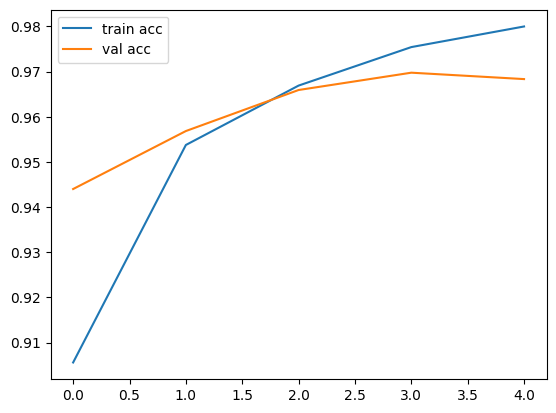

In [7]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Deliverables
	•	A working Colab notebook with all cells executed.
	•	Screenshots or printout of:
	•	Model summary.
	•	Training/validation accuracy curves.
	•	Final test accuracy.
	•	Sample predictions on test images.